In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
def resident(x, t):
    lambda1 = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lambda1*x[0]
    i1dot = sigmaS*lambda1*x[0] - (mu+alpha1+(sigmaI*lambda1))*x[1]
    d11dot = sigmaI*lambda1*x[1] - (mu+alpha1)*x[2]
    return sdot,i1dot,d11dot

In [3]:
mu = 0.02
rho = 0.02
sigmaS = 1
sigmaI = 5

tmax2 = 20000
ts2 = np.linspace(0,200,tmax2)

In [10]:
m = 51
rm=np.zeros((m,m))

for n in range(0,m):
    beta1 = n/50
    alpha1 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(beta1 - 0.75)/0.157))
    
    x0 = [0.8,0.5,0.05]
    xs = odeint(resident,x0,ts2)
    Ss = xs[:,0]
    I1s = xs[:,1]
    D11s = xs[:,2]

    S=Ss[tmax2-1]
    I1=I1s[tmax2-1]
    D11=D11s[tmax2-1]
    
    lambda1 = beta1*(I1+D11)
    
    for i in range(0,m):
        betam = i/50
        alpham = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(betam - 0.75)/0.157))
        
        rm[i][n]=(sigmaS*((betam+((betam/(mu+alpham))*sigmaI*lambda1))/(mu+alpham+(sigmaI*lambda1)))*S + sigmaI*(betam/(mu+alpham))*I1) - 1

In [11]:
rm

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.56077797, -0.56362714, -0.55379699, ..., -0.87228659,
        -0.87202856, -0.87173348],
       [-0.14519147, -0.15073648, -0.13160517, ..., -0.75144574,
        -0.75094355, -0.75036927],
       ...,
       [ 5.06354538,  5.02421211,  5.15991921, ...,  0.76310836,
         0.76667056,  0.77074424],
       [ 5.03103771,  4.99191531,  5.12689486, ...,  0.75365604,
         0.75719915,  0.76125099],
       [ 4.99628545,  4.95738848,  5.09159025, ...,  0.74355106,
         0.74707375,  0.75110224]])

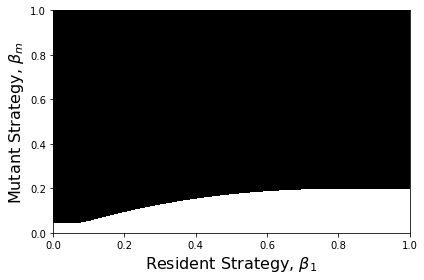

In [12]:
bets=np.linspace(0,1,m)
plt.contourf(bets,bets,rm,0,colors=('w','k'))
plt.xlabel(r'Resident Strategy, $\beta_1$',fontsize=16)
plt.ylabel(r'Mutant Strategy, $\beta_m$',fontsize=16)
plt.tight_layout()
#plt.colorbar()
plt.show()